# Symbulate Documentation

# Common Continuous Distributions

1. [**Introduction to continuous distributions and random variables**](#continuous)
1. [**Uniform**](#uniform)
1. [**Normal (a.k.a. Gaussian)**](#normal)
1. [**LogNormal**](#lognormal)
1. [**Exponential**](#exponential)
1. [**Gamma**](#gamma)
1. [**ChiSquare**](#chisquare)
1. [**StudentT**](#t)
1. [**Cauchy**](#cauchy)
1. [**F**](#f)
1. [**Beta**](#beta)

< [Common discrete distributions](common_discrete.html) | [Contents](index.html) | [Methods for common discrete and continuous distributions](common_general_comments.html) >

Be sure to import Symbulate using the following commands.

In [1]:
from symbulate import *
%matplotlib inline

<a id='continuous'></a>
### Introduction to continuous distributions and random variables

<a id='pdf'></a>
A **continuous probability distribution** is specified by a nonnegative **probability density function (pdf)** $f$ which can be integrated to find probabilities of events.  A probability measure $P$ is specified by a density $f$ if for any event $A$

$$
P(A) = \int_A f(x)\, dx.
$$

A probability density function $f$ must be nonnegative and satisfy $\int_{-\infty}^\infty\, f(x)\, dx = 1$.

The density $f(x)$ at a point $x$ is *not* a probability.  A continuous distribution assigns a probability of zero to any single value $\{x\}$, but $f(x)$ is related to the probability of being "close to" $x$:

$$
P\left(\left[x - h/2, x + h/2\right]\right) \approx hf(x) \qquad \text{for small $h$.}
$$

A **continuous random variable** $X$ defined on a probability space with probability measure $P$ has a probability density function $f_X$ if for any susbet of real numbers $A$,

$$
P(X \in A) = \int_A \, f_X(x)\, dx.
$$

If $X$ is a continuous random variable, then $P(X=x)=0$ for any $x$, but

$$
P\left(x - h/2 < X< x + h/2\right) \approx hf_X(x) \qquad \text{for small $h$.}
$$

The expected value of a continuous random variable is

$$
E(X) = \int_{-\infty}^\infty \, x\, f_X(x) \, dx
$$

<a id='uniform'></a>
### Uniform

**(Continuous) Uniform** distributions are used to model situations is which every value in an interval is "equally likely" in the sense of having the same density.  The density of a Uniform distribution with parameters $a$ and $b$ is constant on the interval $(a, b)$ and is specified by the probability density function

$$
f(x) = \frac{1}{b-a}, \quad a < x < b.
$$

If $X$ is a random variable with a Uniform($a, b$) distribution then
$$
\begin{align*}
E(X) & = \frac{a + b}{2} \\
Var(X) & = \frac{(b - a)^2}{12}
\end{align*}
$$

*Example.* Actual and simulated pdf for `Uniform(a=1, b=3)`.

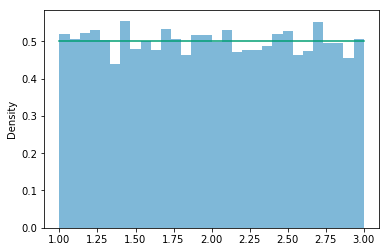

In [2]:
sims = RV(Uniform(a=1, b=3)).sim(10000)
sims.plot()
Uniform(a=1, b=3).plot()

In [3]:
print('The simulated mean is: {:.2f}'.format(sims.mean()))
print('The true mean is: {:.2f}'.format(Uniform(a=1, b=3).mean()))

The simulated mean is: 1.99
The true mean is: 2.00


In [4]:
print('The simulated variance is: {:.2f}'.format(sims.var()))
print('The true variance is: {:.2f}'.format(Uniform(a=1, b=3).var()))

The simulated variance is: 0.33
The true variance is: 0.33


*Example.* `Uniform(a=1, b)` pdf.

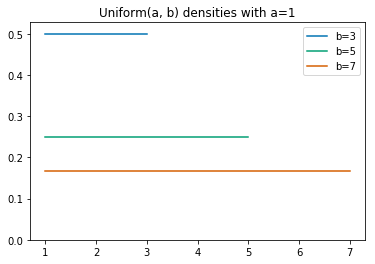

In [5]:
bs = [3, 5, 7]
for b in bs:
    Uniform(a=1, b=b).plot()

plt.legend(["b=" + str(i) for i in bs])
plt.title("Uniform(a, b) densities with a=1")

<a id='normal'></a>
### Normal (a.k.a. Gaussian)

A **Normal** (a.k.a. **Gaussian**) distribution with mean $\mu$ and standard deviation $\sigma>0$ (and variance $\sigma^2$) has the probability density function

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left({-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}\right), \quad -\infty < x< \infty.
$$

If $X$ is a random variable with a Normal($\mu$, $\sigma$) distribution then

$$
\begin{align*}
E(X) & = \mu \\
Var(X) & = \sigma^2
\end{align*}
$$

*Example.* Actual and simulated pdf for `Normal(mean=1, sd=2)`.

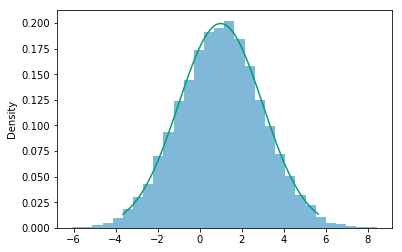

In [6]:
sims = RV(Normal(mean=1, sd=2)).sim(10000)
sims.plot()
Normal(mean=1, sd=2).plot()

In [7]:
print('The simulated mean is: {:.2f}'.format(sims.mean()))
print('The true mean is: {:.2f}'.format(Normal(mean=1, sd=2).mean()))

The simulated mean is: 1.00
The true mean is: 1.00


In [8]:
print('The simulated variance is: {:.2f}'.format(sims.var()))
print('The true variance is: {:.2f}'.format(Normal(mean=1, sd=2).var()))

The simulated variance is: 3.96
The true variance is: 4.00


*Example.* `Normal(mu, sd=1)` pdf.

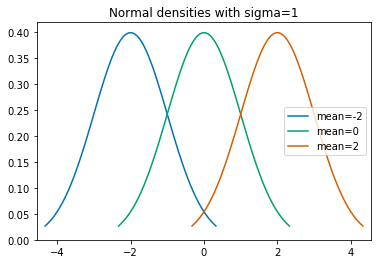

In [9]:
mus = [-2, 0, 2]
for mu in mus:
    Normal(mean=mu, sd=1).plot()
    
plt.legend(["mean=" + str(i) for i in mus])
plt.title("Normal densities with sigma=1")

*Example.* `Normal(mean=0, sd)` pdf.

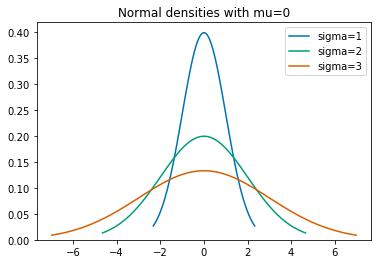

In [10]:
sigmas = [1, 2, 3]
for sigma in sigmas:
    Normal(mean=0, sd=sigma).plot()
    
plt.legend(["sigma=" + str(i) for i in sigmas])
plt.title("Normal densities with mu=0")

<a id='lognormal'></a>
### LogNormal

A **LogNormal** distribution with parameters $\mu \in \mathbb{R}$ and $\sigma >0$ is specified by the probability density function

$$
f(x) = \frac{1}{x\sigma  \sqrt{2\pi}} \exp\left(-\frac{1}{2}\left(\frac{\log(x)-\mu}{\sigma}\right)^2\right)
$$

If $X$ is a random variable with a LogNormal($\mu$, $\sigma$) distribution then 

$$
\begin{align*}
E(X) & = \exp(\mu + \sigma^2/2) \\
Var(X) & = \left(\exp\left(\sigma^2\right)-1\right)\exp\left(2\mu+\sigma^2\right)
\end{align*}
$$

*Example.* Actual and simulated pdf for `LogNormal(mu=0, sigma=1)`.

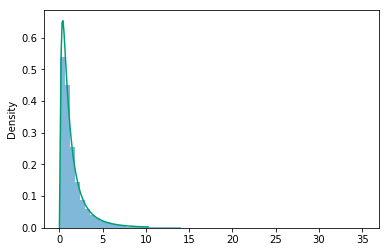

In [11]:
sims = RV(LogNormal(mu=0, sigma=1)).sim(10000)
sims.plot(bins=60)
LogNormal(mu=0, sigma=1).plot()

In [12]:
print('The simulated mean is: {:.2f}'.format(sims.mean()))
print('The true mean is: {:.2f}'.format(LogNormal(mu=0, sigma=1).mean()))

The simulated mean is: 1.61
The true mean is: 1.65


If $Y$ has a LogNormal($\mu,\,\sigma$), then $\log(Y)$ has a normal distribution with mean $\mu$ and sd $\sigma$.

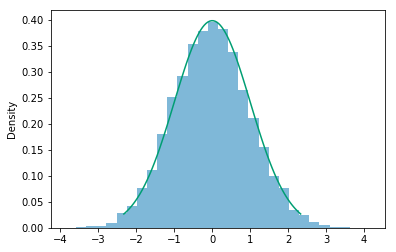

In [13]:
Y = RV(LogNormal(mu=0, sigma=1))
log(Y).sim(10000).plot()
Normal(mean=0, sd=1).plot()

<a id='exponential'></a>
### Exponential

An **Exponential** distribution with rate parameter $\lambda>0$ is specified by the probability density function

$$
f(x) = \lambda e^{-\lambda x}, \quad x>0.
$$

Exponential distributions can be parametrized in terms of the rate parameter $\lambda$ (using `rate=`) or the scale parameter $1/\lambda$ (using `scale=`).  

If $X$ is a random variable with a Exponential($\lambda$) distribution then

$$
\begin{align*}
E(X) & = \frac{1}{\lambda} \\
Var(X) & = \frac{1}{\lambda^2}
\end{align*}
$$

*Example.* Actual and simulated pdf for `Exponential(rate=2)`.

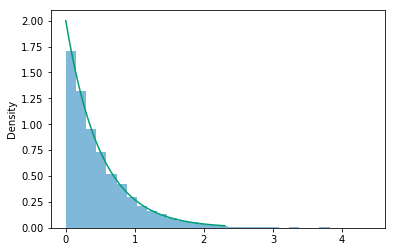

In [14]:
sims = RV(Exponential(rate=2)).sim(10000)
sims.plot()
Exponential(rate=2).plot()

In [15]:
print('The simulated mean is: {:.2f}'.format(sims.mean()))
print('The true mean is: {:.2f}'.format(Exponential(rate=2).mean()))

The simulated mean is: 0.50
The true mean is: 0.50


In [16]:
print('The simulated variance is: {:.2f}'.format(sims.var()))
print('The true variance is: {:.2f}'.format(Exponential(rate=2).var()))

The simulated variance is: 0.25
The true variance is: 0.25


*Example.* `Exponential(rate)` pdf.

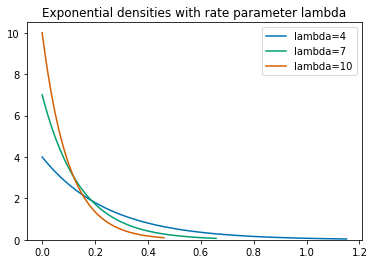

In [17]:
rates = [4, 7, 10]
for rate in rates:
    Exponential(rate).plot()
    
plt.legend(["lambda=" + str(i) for i in rates])
plt.title("Exponential densities with rate parameter lambda")

<a id='gamma'></a>
### Gamma

A **Gamma** distribution with shape parameter $\alpha>0$ and rate parameter $\lambda >0$ has density

$$
f(x) = \frac{\lambda^\alpha}{\Gamma(\alpha)} e^{-\lambda x} x^{\alpha -1}, \quad x>0,
$$

where 

$$
\Gamma(\alpha) = \int_0^\infty e^{-u}u^{\alpha - 1}\, du, \quad \text{with } \Gamma(k) = (k-1)! \text{ if $k$ is a positive integer.}
$$

Gamma distributions can be parametrized in terms of the rate parameter $\lambda$ (using `rate=`) or the scale parameter $1/\lambda$ (using `scale=`).

If $X$ is a random variable with a Gamma($\alpha, \lambda$) distribution then

$$
\begin{align*}
E(X) & = \frac{\alpha}{\lambda} \\
Var(X) & = \frac{\alpha}{\lambda^2}
\end{align*}
$$

*Example.* Actual and simulated pdf for `Gamma(shape=4, rate=2)`.

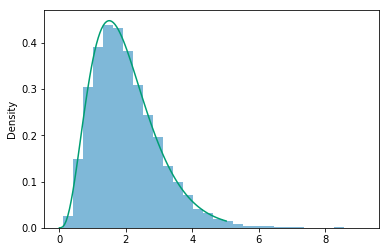

In [18]:
sims = RV(Gamma(shape=4,rate=2)).sim(10000)
sims.plot()
Gamma(shape=4,rate=2).plot()

In [19]:
print('The simulated mean is: {:.2f}'.format(sims.mean()))
print('The true mean is: {:.2f}'.format(Gamma(shape=4, rate=2).mean()))

The simulated mean is: 2.01
The true mean is: 2.00


In [20]:
print('The simulated variance is: {:.2f}'.format(sims.var()))
print('The true variance is: {:.2f}'.format(Gamma(shape=4, rate=2).var()))

The simulated variance is: 1.02
The true variance is: 1.00


*Example.* `Exponential(shape=4, rate)` pdf.

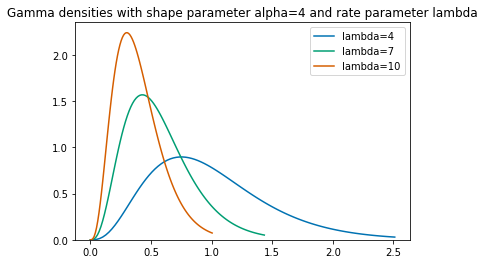

In [21]:
rates = [4, 7, 10]
for rate in [4, 7, 10]:
    Gamma(shape=4, rate=rate).plot()
    
plt.legend(["lambda=" + str(i) for i in rates])
plt.title("Gamma densities with shape parameter alpha=4 and rate parameter lambda")

*Example.* `Exponential(shape, rate=2)` pdf.

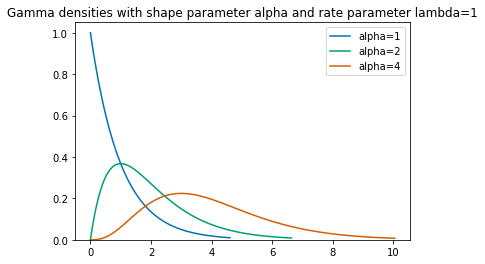

In [22]:
shapes = [1, 2, 4]
for shape in shapes:
    Gamma(shape=shape, rate=1).plot()

plt.legend(["alpha=" + str(i) for i in shapes])
plt.title("Gamma densities with shape parameter alpha and rate parameter lambda=1")

<a id='chisquare'></a>
### ChiSquare

A [Gamma](#gamma) distribution with shape parameter $\frac{d}{2}$ and rate parameter $\frac{1}{2}$ is also known as a **Chi-square** (`ChiSquare`) distribution with $d$ degrees of freedom and has density

$$
f(x) = \frac{\frac{1}{2}^{d/2}}{\Gamma\left(\frac{d}{2}\right)} e^{-\left(1/2\right)x} \, x^{ d/2 - 1}, \quad x>0
$$

If $X$ is a random variable with a ChiSquare($d$) distribution then

$$
\begin{align*}
E(X) & = d \\
Var(X) & = 2d
\end{align*}
$$

*Example.* Actual and simulated pdf for `ChiSquare(df=2)`.

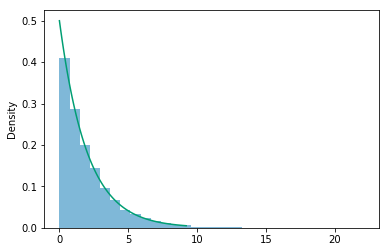

In [23]:
sims = RV(ChiSquare(df=2)).sim(10000)
sims.plot()
ChiSquare(df=2).plot()

In [24]:
print('The simulated mean is: {:.2f}'.format(sims.mean()))
print('The true mean is: {:.2f}'.format(ChiSquare(df=2).mean()))

The simulated mean is: 2.02
The true mean is: 2.00


In [25]:
print('The simulated variance is: {:.2f}'.format(sims.var()))
print('The true variance is: {:.2f}'.format(ChiSquare(df=2).var()))

The simulated variance is: 3.96
The true variance is: 4.00


*Example.* `ChiSquare(df)` pdf.

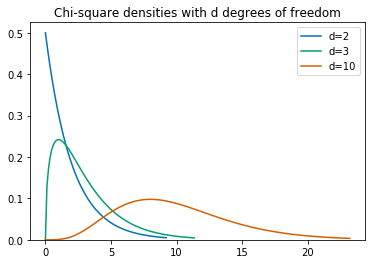

In [26]:
ds = [2, 3, 10]
for df in ds:
    ChiSquare(df).plot()

plt.legend(["d=" + str(i) for i in ds])
plt.title("Chi-square densities with d degrees of freedom")

<a id='t'></a>
### StudentT

A **(Student's) t** (`StudentT`) distribution with *d* degrees of freedom has the probability density function

$$
f(x) = \frac{\Gamma \left(\frac{d+1}{2}\right)}{\sqrt{d\pi}\,\Gamma\left(\frac{d}{2}\right)} \left(1+x^{2}/d\right)^{-\left(d+1\right)/2}
$$

If $X$ is a random variable with a StudentT($d$) distribution then
$$
\begin{align*}
E(X) & = 0, & & \quad \text{if $d>1$,}\\
Var(X) & = \frac{d}{d - 2}, & & \quad \text{if $d>2$.} 
\end{align*}
$$

*Example.* Actual and simulated pdf for `StudentT(df=5)`.

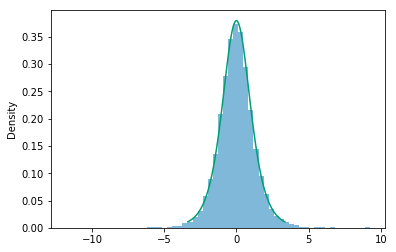

In [27]:
sims = RV(StudentT(df=5)).sim(10000)
sims.plot(bins=60)
StudentT(df=5).plot()

In [28]:
print('The simulated mean is: {:.2f}'.format(sims.mean()))
print('The true mean is: {:.2f}'.format(StudentT(df=5).mean()))

The simulated mean is: -0.01
The true mean is: 0.00


In [29]:
print('The simulated variance is: {:.2f}'.format(sims.var()))
print('The true variance is: {:.2f}'.format(StudentT(df=5).var()))

The simulated variance is: 1.61
The true variance is: 1.67


*Example.* `StudentT(df)` pdf.

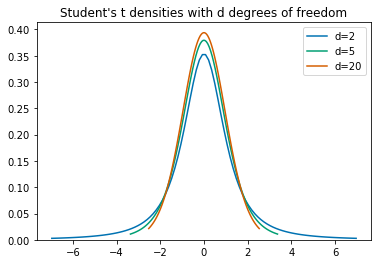

In [30]:
ds = [2, 5, 20]
for d in ds:
    StudentT(df=d).plot()

plt.legend(["d=" + str(i) for i in ds])
plt.title("Student's t densities with d degrees of freedom")

A `StudentT` distribution is more conveniently defined via the following: 

If Z has a Normal(0,1) distribution, Y has a Chi-square distribution with $d$ degrees of freedom, and Y and Z are independent, then the random variable

$$\frac{Z}{ \sqrt{Y/d} }$$

has a Student's t distribution with *d* degrees of freedom.

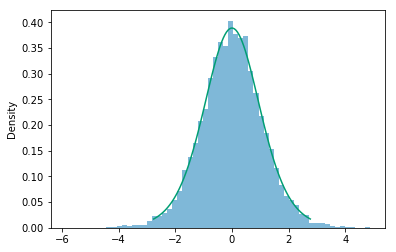

In [31]:
d = 10
Y, Z = RV(ChiSquare(d) * Normal(0, 1))
(Z / sqrt(Y / d)).sim(10000).plot(bins=60)
StudentT(d).plot()

<a id='cauchy'></a>
### Cauchy

The Student's t distribution with 1 degree of freedom is also known as the standard Cauchy distribution.  General Cauchy distributions can be obtained through location-scale transformations of the Student's t distribution with 1 degree of freedom.

The **Cauchy** distribution with location parameter $x_0$ and scale parameter $\gamma$ has the probability density function

$$
f(x) = \frac{1}{\pi\gamma} \frac{1}{1 + \left(\frac{x - x_0}{\gamma}\right)^2}
$$

If $X$ is a random variable with a Cauchy($x_0,\,\gamma$) distribution then
$$
\begin{align*}
E(X) & \text{ is undefined}  \\
Var(X) & \text{ is undefined}
\end{align*}
$$

*Example.* Actual and simulated pdf for `Cauchy(loc=0, scale=1)`.

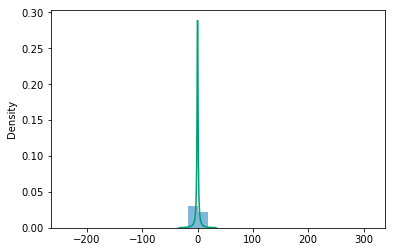

In [32]:
sims = RV(Cauchy(loc=0, scale=1)).sim(1000)
sims.plot()
Cauchy(loc=0, scale=1).plot()

Because the expected value and variance do not exist, the sample mean and sample variance are not consistent estimators of anything.  (The law of large numbers does not hold for distributions for which the mean is undefined.)

In [33]:
print('The simulated mean is: {:.2f}'.format(sims.mean()))
print('The true mean is: {:.2f}'.format(Cauchy(loc = 0, scale = 1).mean()))

The simulated mean is: 0.82
The true mean is: nan


In [34]:
print('The simulated variance is: {:.2f}'.format(sims.var()))
print('The true variance is: {:.2f}'.format(Cauchy(loc = 0, scale = 1).var()))

The simulated variance is: 357.46
The true variance is: nan


*Example.* `Cauchy(loc=0, scale)` pdf.

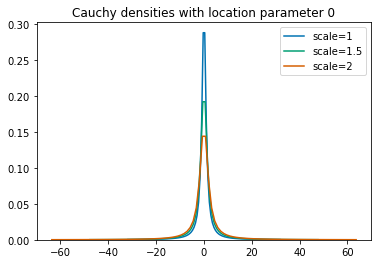

In [35]:
scales = [1, 1.5, 2]
for scale in scales:
    Cauchy(loc=0, scale=scale).plot()
    
plt.legend(["scale=" + str(i) for i in scales])
plt.title("Cauchy densities with location parameter 0")

*Example.* `Cauchy(loc, scale=1)` pdf.

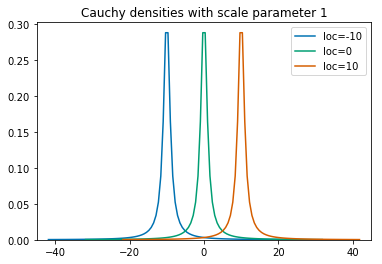

In [36]:
locs = [-10, 0, 10]
for loc in locs:
    Cauchy(loc=loc, scale=1).plot()
    
plt.legend(["loc=" + str(i) for i in locs])
plt.title("Cauchy densities with scale parameter 1")

<a id='f'></a>
### F

An **F** distribution with $d_1$ degrees of freedom in the numerator and $d_2$  degrees of freedom in the denominator has the probability density function


$$
f(x) = \frac{\Gamma\left(\left(d_1 + d_2\right)/2\right)d_1^{d_1/2}d_2^{d_2/2}}{\Gamma\left(d_1/2\right)\Gamma\left(d_2/2\right)} \frac{x^{d_1/2 - 1}}{\left(d_1 x + d_2\right)^{\left(d_1 + d_2\right)/2}}, \quad x > 0
$$

If $X$ is a random variable with a $F(d_1, d_2)$ distribution then

$$
\begin{align*}
E(X) & = \frac{d_2}{d_2 - 2} \qquad \text{for} \, d_2> 2 \\
Var(X) & = \frac{2d_2^2(d_1 + d_2 - 2)}{d_1(d_2-2)^2(d_2-4)} \qquad \text{for} \, d_2 > 4
\end{align*}
$$

*Example.* Actual and simulated pdf for `F(dfN=5, dfD=10)`.

C:\Users\kjross\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1421: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


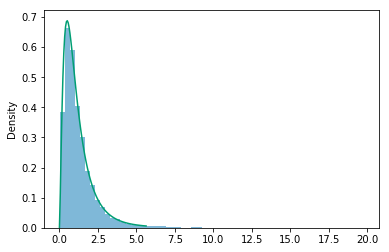

In [37]:
sims = RV(F(dfN=5, dfD=10)).sim(10000)
sims.plot(bins=60)
F(dfN=5, dfD=10).plot()

In [38]:
print('The simulated mean is: {:.2f}'.format(sims.mean()))
print('The true mean is: {:.2f}'.format(F(dfN=5, dfD=10).mean()))

The simulated mean is: 1.25
The true mean is: 1.25


In [39]:
print('The simulated variance is: {:.2f}'.format(sims.var()))
print('The true variance is: {:.2f}'.format(F(dfN=5, dfD=10).var()))

The simulated variance is: 1.36
The true variance is: 1.35


*Example.* `F(dfN, dfD=20)` pdf.

C:\Users\kjross\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1421: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


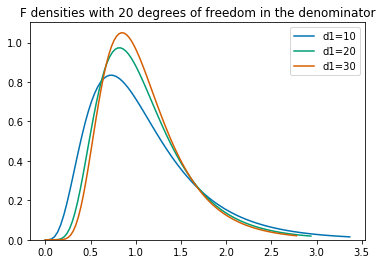

In [40]:
dfNs = [10, 20, 30]
for dfN in dfNs:
    F(dfN=dfN, dfD=20).plot()
    
plt.legend(["d1=" + str(i) for i in dfNs])
plt.title("F densities with 20 degrees of freedom in the denominator")

*Example.* `F(dfN = 50, dfD)` pdf.

C:\Users\kjross\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1421: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


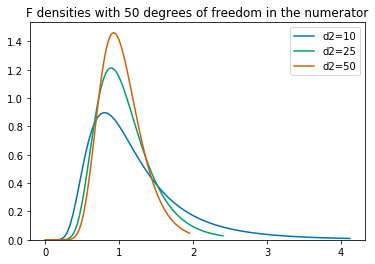

In [41]:
dfDs = [10, 25, 50]
for dfD in dfDs:
    F(dfN=50, dfD=dfD).plot()

plt.legend(["d2=" + str(i) for i in dfDs])
plt.title("F densities with 50 degrees of freedom in the numerator")

An F distribution is more conviently defined via the following:

If $Y_1$ has a chi-square distribution with m degrees of freedom, $Y_2$ has a chi-square distribution with n degress of freedom, and $Y_1$ and $Y_2$ are independent, then the random variable 

$$\frac{Y_1/m}{Y_2/n}$$

has an F distribution with m degrees of freedom in the numerator and n degrees of freedom in the denominator.

<a id='beta'></a>
### Beta

**Beta** distributions are probability distributions on bounded intervals.  For a Uniform(0, 1) distribution, the probability density is constant on the interval (0, 1).  Beta distributions are probability distributions on the interval (0, 1) where the density is not necessarily constant.  A Beta distribution with parameters $\alpha>0$ and $\beta>0$ has the probability density function

$$
f(x) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}  x^{\alpha-1} (1-x)^{\beta-1}, \qquad 0 < x < 1,
$$

where 

$$
\Gamma(\alpha) = \int_0^\infty e^{-u}u^{\alpha - 1}\, du, \quad \text{with } \Gamma(k) = (k-1)! \text{ if $k$ is a positive integer}
$$

Note that the Beta distribution with $\alpha = \beta=1$ is the Uniform(0,  1) distribution.

If $X$ is a random variable with a Beta($\alpha, \beta$) distribution then
$$
\begin{align*}
E(X) & = \frac{\alpha}{\alpha + \beta} \\
Var(X) & = \frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}
\end{align*}
$$

*Example.* Actual and simulated pdf for `Beta(a=2, b=3)`.

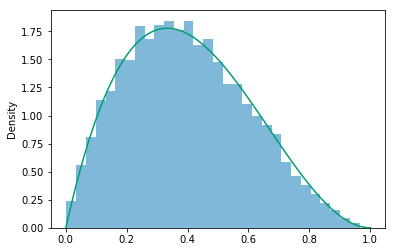

In [42]:
sims = RV(Beta(a=2, b=3)).sim(10000)
sims.plot()
Beta(a=2, b=3).plot()

In [43]:
print('The simulated mean is: {:.2f}'.format(sims.mean()))
print('The true mean is: {:.2f}'.format(Beta(a=2, b=3).mean()))

The simulated mean is: 0.40
The true mean is: 0.40


In [44]:
print('The simulated variance is: {:.2f}'.format(sims.var()))
print('The true variance is: {:.2f}'.format(Beta(a=2, b=3).var()))

The simulated variance is: 0.04
The true variance is: 0.04


*Example.* `Beta(a, b=1)` pdf.

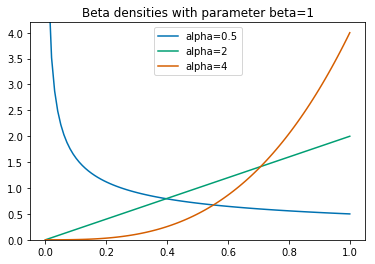

In [45]:
alphas = [0.5, 2, 4]
for a in alphas:
    Beta(a, b=1).plot()
    
plt.legend(["alpha=" + str(i) for i in alphas])
plt.title("Beta densities with parameter beta=1")

*Example.* `Beta(a=2, b)` pdf.

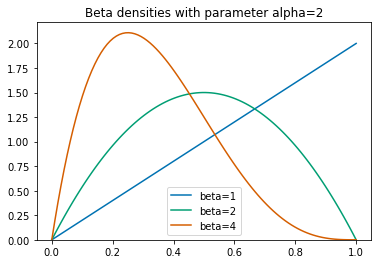

In [46]:
betas = [1, 2, 4]
for b in betas:
    Beta(a=2, b=b).plot()
    
plt.legend(["beta=" + str(i) for i in betas])
plt.title("Beta densities with parameter alpha=2")

Beta distributions can be generalized to intervals $(c, d)$ by rescaling.  If $X$ has a Beta distribution then $c + (d-c) X$ will have a distribution with the same shape on the interval $(c, d)$.

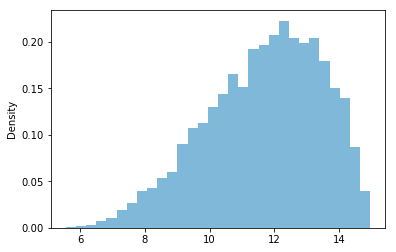

In [47]:
X = RV(Beta(4, 2))
c = 5
d = 15
(c + (d - c) * X).sim(10000).plot()

< [Common discrete distributions](common_discrete.html) | [Contents](index.html) | [Methods for common discrete and continuous distributions](common_general_comments.html) >